<a href="https://colab.research.google.com/github/nikhil-xyz/ImageClassification/blob/main/Chessman_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The model will try to predict the chessman name by looking at its image

In [1]:
!git clone https://github.com/nikhil-xyz/ImageClassification.git

Cloning into 'ImageClassification'...
remote: Enumerating objects: 10277, done.
remote: Counting objects: 100% (264/264), done.
remote: Compressing objects: 100% (260/260), done.
remote: Total 10277 (delta 17), reused 226 (delta 2), pack-reused 10013
Receiving objects: 100% (10277/10277), 271.04 MiB | 34.68 MiB/s, done.
Resolving deltas: 100% (19/19), done.
Checking out files: 100% (10248/10248), done.


In [2]:
!mkdir -p ~/.kaggle
!cp ImageClassification/kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d niteshfre/chessman-image-dataset

 87% 50.0M/57.6M [00:00<00:00, 83.4MB/s]
100% 57.6M/57.6M [00:00<00:00, 88.6MB/s]


In [4]:
import zipfile 
zip_ref = zipfile.ZipFile('/content/chessman-image-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

Importing Dependencies

In [5]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [6]:
path = os.path.join('Chessman-image-dataset', 'Chess')

In [7]:
path

'Chessman-image-dataset/Chess'

In [8]:
import imghdr
image_exts = ['jpeg', 'jpg', 'bmp', 'png']
for image_class in os.listdir(os.path.join(path)):
  for image in os.listdir(os.path.join(path, image_class)):
    image_path = os.path.join(path, image_class, image)
    # img = cv2.imread(image_path)
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # plt.imshow(img)
    tip = imghdr.what(image_path)
    if tip not in image_exts:
      os.remove(image_path)

Generator

In [9]:
data = tf.keras.utils.image_dataset_from_directory(os.path.join(path))
data = data.map(lambda x, y : (x/255, y))

Found 542 files belonging to 6 classes.


In [26]:
tf.keras.utils.image_dataset_from_directory

<function keras.utils.image_dataset.image_dataset_from_directory(directory, labels='inferred', label_mode='int', class_names=None, color_mode='rgb', batch_size=32, image_size=(256, 256), shuffle=True, seed=None, validation_split=None, subset=None, interpolation='bilinear', follow_links=False, crop_to_aspect_ratio=False, **kwargs)>

In [24]:
len(data)

17

In [11]:
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.2) + 1
test_size = int(len(data) * 0.1) + 1
print(train_size, val_size, test_size)

11 4 2


In [12]:
train = data.take(train_size)
validation = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

Model Building

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (256, 256, 3)),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(128, (3 , 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(6, activation = 'sigmoid')
])

In [14]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [16]:
history = model.fit(train, epochs = 15, validation_data = validation)

Epoch 1/15
11/11 [==============================] - 56s 5s/step - loss: 2.2000 - accuracy: 0.1705 - val_loss: 1.7918 - val_accuracy: 0.1484
Epoch 2/15
11/11 [==============================] - 55s 5s/step - loss: 1.7791 - accuracy: 0.2131 - val_loss: 1.7582 - val_accuracy: 0.1875
Epoch 3/15
11/11 [==============================] - 58s 5s/step - loss: 1.7140 - accuracy: 0.2869 - val_loss: 1.6262 - val_accuracy: 0.3203
Epoch 4/15
11/11 [==============================] - 55s 5s/step - loss: 1.5415 - accuracy: 0.4176 - val_loss: 1.5418 - val_accuracy: 0.3672
Epoch 5/15
11/11 [==============================] - 56s 5s/step - loss: 1.3827 - accuracy: 0.5057 - val_loss: 1.3053 - val_accuracy: 0.5234
Epoch 6/15
11/11 [==============================] - 59s 5s/step - loss: 1.2123 - accuracy: 0.5881 - val_loss: 1.0872 - val_accuracy: 0.5859
Epoch 7/15
11/11 [==============================] - 55s 5s/step - loss: 0.9421 - accuracy: 0.6193 - val_loss: 0.9505 - val_accuracy: 0.6406
Epoch 8/15
11/11 [==

In [ ]:
# y_pred = model.predict(test)
# y_pred = [np.argmax(y) for y in y_pred]

In [18]:
classes = ['Bishop', 'King', 'Knight', 'Pawn', 'Queen', 'Rook']

In [27]:
print(len(test))

2


Predicting Few Classes

1/1 [==============================] - 0s 56ms/step


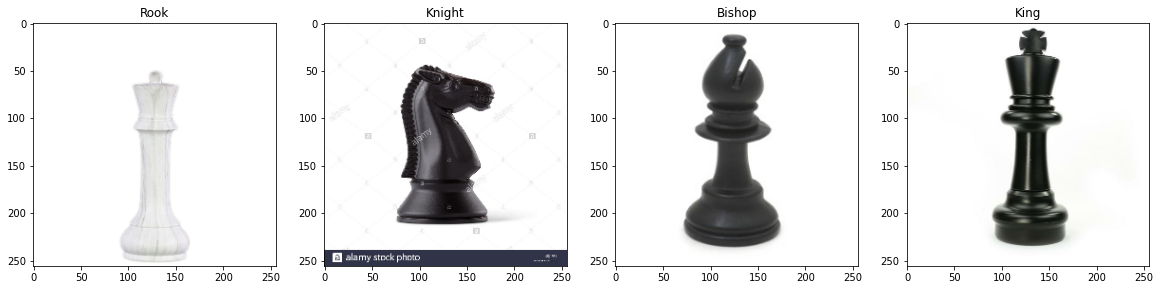

In [38]:
iter = test.as_numpy_iterator()
batch = iter.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for index in range(4):
  ax[index].imshow(np.squeeze(batch[0][index]))
  pred = np.argmax(model.predict(np.expand_dims(batch[0][index], 0)))
  ax[index].title.set_text(classes[pred])

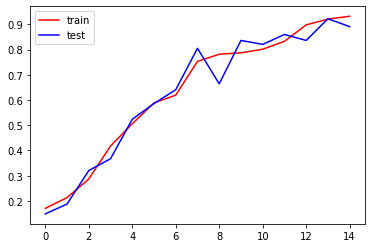

In [40]:
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='test')
plt.legend()
plt.show()

In [107]:
labels = []
y_pred = []
iter = test.as_numpy_iterator()
for i in range(len(test)):
  batch = iter.next()
  labels.extend(batch[1])
  temp = model.predict(batch[0])
  temp = [np.argmax(y) for y in temp]
  y_pred.extend(temp)

1/1 [==============================] - 1s 1s/step


In [111]:
labels = np.array(labels)
y_pred = np.array(y_pred)
print(labels)
print(y_pred)

[1 1 2 3 4 4 2 5 0 5 0 0 5 1 4 5 2 1 2 2 5 3 4 3 0 2 2 4 0 2 1 5 2 2 0 3 2
 0 1 4 0 1 0 3 2 2 0 3 1 0 2 3 0 5 1 2 2 1 4 5 3 5]
[1 1 2 3 4 4 2 4 0 5 0 0 5 1 4 5 2 1 2 2 5 3 4 3 0 5 2 4 0 2 4 5 2 2 0 3 2
 0 1 4 0 4 1 2 2 2 0 3 1 4 2 3 0 5 1 2 2 4 4 5 3 5]


In [112]:
cm = tf.math.confusion_matrix(labels = labels, predictions = y_pred, num_classes=6)

In [113]:
print(cm)

tf.Tensor(
[[10  1  0  0  1  0]
 [ 0  7  0  0  3  0]
 [ 0  0 15  0  0  1]
 [ 0  0  1  7  0  0]
 [ 0  0  0  0  7  0]
 [ 0  0  0  0  1  8]], shape=(6, 6), dtype=int32)


Drawing Heatmap

Text(69.0, 0.5, 'True')

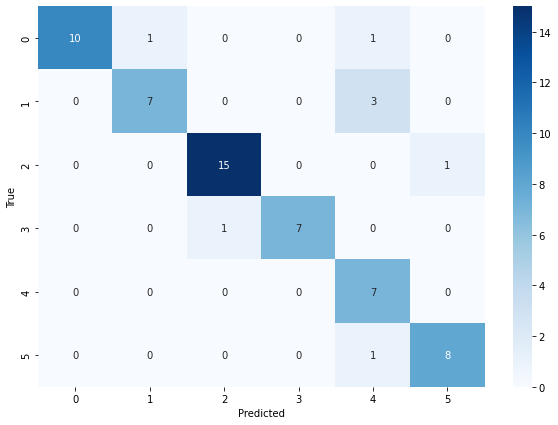

In [115]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')